In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset after cleaning data 1
df = pd.read_csv('../../Data/house_price/cleaning/train_cleaned_missing_value_80.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
# read and visualize the missing value
missing_value = df.isnull().sum()
missing_percent = (missing_value / len(df)) * 100  
missing_data_type = df.dtypes

missing_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 77, dtype: float64

In [6]:
missing_data = pd.DataFrame({'Missing Value': missing_value, 'Percentage': missing_percent, 'Data Type': missing_data_type})
missing_data = missing_data[missing_data['Missing Value'] > 0].sort_values(by='Percentage', ascending=False)
missing_data

,Missing Value,Percentage,Data Type
MasVnrType,872,59.726027,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageYrBlt,81,5.547945,float64
GarageFinish,81,5.547945,object
GarageType,81,5.547945,object
GarageQual,81,5.547945,object
GarageCond,81,5.547945,object
BsmtExposure,38,2.602740,object
BsmtFinType2,38,2.602740,object


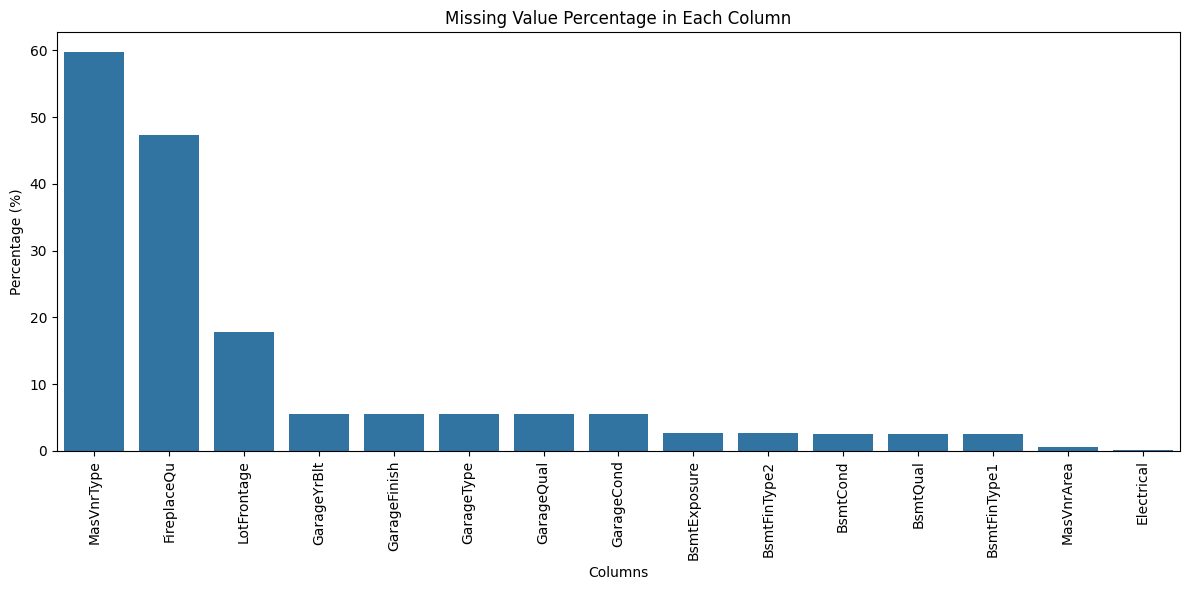

In [7]:
# VISUALIZE MISSING VALUE
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data.index, y='Percentage', data=missing_data)
plt.xticks(rotation=90)
plt.title('Missing Value Percentage in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.show()

In [8]:
# kondisi data type numeric dan categorical
numeric_columns = missing_data[missing_data['Data Type'] != 'object'].index.tolist()
categorical_columns = missing_data[missing_data['Data Type'] == 'object'].index.tolist()

for col in numeric_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# check missing value after filling
print("\nJumlah missing values setelah imputasi:")
print(df.isnull().sum().sum())


Jumlah missing values setelah imputasi:
0


C:\Users\YUDHA\AppData\Local\Temp\ipykernel_21668\3597863683.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\YUDHA\AppData\Local\Temp\ipykernel_21668\3597863683.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [10]:
missing_value = df.isnull().sum()
missing_percent = (missing_value / len(df)) * 100
missing_data_type = df.dtypes

missing_percent

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 77, dtype: float64

In [12]:
missing_data = pd.DataFrame({'Missing Value': missing_value, 'Percentage': missing_percent, 'Data Type': missing_data_type})
missing_data = missing_data[missing_data['Missing Value'] > 0].sort_values(by='Percentage', ascending=False)
missing_data

,Missing Value,Percentage,Data Type


In [13]:
df.to_csv('../../Data/house_price/cleaning/train_cleaned_imputatuion.csv', index=False)